In [1]:
import os
import time
import random
import pickle
import warnings
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch.utils.data import DataLoader

from utils import *
from proposal import SimVPTEST

In [2]:
# ignore warning message
warnings.filterwarnings('ignore')

# fix seed
os.environ['PYTHONHASHSEED'] = str(42)
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [3]:
if torch.cuda.is_available():
    print(f'GPU count: {torch.cuda.device_count()}')
    for i in range(torch.cuda.device_count()):
        print(f'GPU {i}: {torch.cuda.get_device_name(i)}')
        print(torch.cuda.get_device_properties(i))
else:
    print('No GPU')

GPU count: 2
GPU 0: NVIDIA A100-SXM4-40GB
_CudaDeviceProperties(name='NVIDIA A100-SXM4-40GB', major=8, minor=0, total_memory=40337MB, multi_processor_count=108)
GPU 1: NVIDIA A100-SXM4-40GB
_CudaDeviceProperties(name='NVIDIA A100-SXM4-40GB', major=8, minor=0, total_memory=40337MB, multi_processor_count=108)


In [4]:
# data : 2017~2021년 5월 31일까지의 전력 사용량 데이터
# train : 2017~2019년 3년동안의 전력 사용량 데이터(3년)
# val : 2020년 1년동안의 전력 사용량 데이터(1년)
# test : 2021년 5월 31일 6개월 동안의 전력 사용량 데이터(6개월)
elec = np.expand_dims(np.load('./dataset/2d_elec.npy'), axis=1)
elec_x, elec_y, elec_val = make_sequential(elec)

train_X = elec_x[:(365*24*3)]
train_y = elec_y[:(365*24*3)]

val_X = elec_x[(365*24*3):(365*24*4)]
val_y = elec_y[(365*24*3):(365*24*4)]

test_X = elec_x[(365*24*4):]
test_y = elec_y[(365*24*4):]

In [5]:
train_dataset = CustomDataset(train_X, train_y)
train_loader = DataLoader(train_dataset, 64, pin_memory=True)

val_dataset = CustomDataset(val_X, val_y)
val_loader = DataLoader(val_dataset, 64, pin_memory=True)

test_dataset = CustomDataset(test_X, test_y)
test_loader = DataLoader(test_dataset, 64, pin_memory=True)

In [6]:
print(f'train_size: {len(train_dataset)}')
print(train_dataset.X.shape)
print(train_dataset.Y.shape)

print(f'val_size: {len(val_dataset)}')
print(val_dataset.X.shape)
print(val_dataset.Y.shape)

print(f'test_size: {len(test_dataset)}')
print(test_dataset.X.shape)
print(test_dataset.Y.shape)

train_size: 26280
(26280, 24, 1, 8, 20)
(26280, 24, 1, 8, 20)
val_size: 8760
(8760, 24, 1, 8, 20)
(8760, 24, 1, 8, 20)
test_size: 3577
(3577, 24, 1, 8, 20)
(3577, 24, 1, 8, 20)


In [7]:
X, _ = next(iter(train_loader))

path = './save_model/SimVPSpatial/'
check_path(path)
model = SimVPTEST(X.shape[1:])

In [8]:
optimizer = torch.optim.AdamW(model.parameters(), lr=.001)
criterion = nn.MSELoss()
epochs = 100
# gpu 1 사용
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')

train_loss, val_loss = train(model, optimizer, criterion, epochs, train_loader, val_loader, device, path=path+'best_SimVPSpatial')

100%|██████████| 137/137 [00:02<00:00, 59.63it/s]


Epoch [1/100] 29.19s
loss: 0.0057 | val_loss: 0.0047


100%|██████████| 137/137 [00:02<00:00, 64.93it/s]


Epoch [2/100] 27.95s
loss: 0.0041 | val_loss: 0.0042


100%|██████████| 137/137 [00:02<00:00, 66.02it/s]


Epoch [3/100] 27.57s
loss: 0.0035 | val_loss: 0.0048


100%|██████████| 137/137 [00:02<00:00, 65.11it/s]


Epoch [4/100] 27.54s
loss: 0.0033 | val_loss: 0.0046


100%|██████████| 137/137 [00:02<00:00, 67.66it/s]


Epoch [5/100] 27.90s
loss: 0.0032 | val_loss: 0.0046


100%|██████████| 137/137 [00:02<00:00, 64.01it/s]


Epoch [6/100] 27.57s
loss: 0.0032 | val_loss: 0.0046


100%|██████████| 137/137 [00:02<00:00, 63.14it/s]


Epoch [7/100] 27.68s
loss: 0.0031 | val_loss: 0.0043


100%|██████████| 137/137 [00:02<00:00, 64.89it/s]


Epoch [8/100] 27.95s
loss: 0.0030 | val_loss: 0.0040


100%|██████████| 137/137 [00:02<00:00, 61.60it/s]


Epoch [9/100] 28.02s
loss: 0.0030 | val_loss: 0.0039


100%|██████████| 137/137 [00:02<00:00, 63.60it/s]


Epoch [10/100] 27.78s
loss: 0.0029 | val_loss: 0.0039


100%|██████████| 137/137 [00:02<00:00, 60.09it/s]


Epoch [11/100] 27.98s
loss: 0.0029 | val_loss: 0.0038


100%|██████████| 137/137 [00:02<00:00, 65.18it/s]


Epoch [12/100] 27.95s
loss: 0.0029 | val_loss: 0.0038


100%|██████████| 137/137 [00:02<00:00, 63.51it/s]


Epoch [13/100] 27.96s
loss: 0.0029 | val_loss: 0.0036


100%|██████████| 137/137 [00:02<00:00, 63.64it/s]


Epoch [14/100] 26.92s
loss: 0.0029 | val_loss: 0.0036


100%|██████████| 137/137 [00:02<00:00, 59.95it/s]


Epoch [15/100] 27.49s
loss: 0.0029 | val_loss: 0.0036


100%|██████████| 137/137 [00:02<00:00, 62.03it/s]


Epoch [16/100] 27.79s
loss: 0.0028 | val_loss: 0.0037


100%|██████████| 137/137 [00:02<00:00, 62.68it/s]


Epoch [17/100] 28.12s
loss: 0.0028 | val_loss: 0.0035


100%|██████████| 137/137 [00:02<00:00, 61.86it/s]


Epoch [18/100] 27.79s
loss: 0.0028 | val_loss: 0.0035


100%|██████████| 137/137 [00:02<00:00, 62.50it/s]


Epoch [19/100] 27.83s
loss: 0.0027 | val_loss: 0.0035


100%|██████████| 137/137 [00:02<00:00, 63.84it/s]


Epoch [20/100] 27.69s
loss: 0.0027 | val_loss: 0.0035


100%|██████████| 137/137 [00:02<00:00, 62.12it/s]


Epoch [21/100] 26.82s
loss: 0.0026 | val_loss: 0.0037


100%|██████████| 137/137 [00:02<00:00, 62.05it/s]


Epoch [22/100] 27.13s
loss: 0.0026 | val_loss: 0.0035


100%|██████████| 137/137 [00:02<00:00, 63.94it/s]


Epoch [23/100] 27.13s
loss: 0.0025 | val_loss: 0.0036


100%|██████████| 137/137 [00:02<00:00, 65.90it/s]


Epoch [24/100] 26.92s
loss: 0.0025 | val_loss: 0.0034


100%|██████████| 137/137 [00:02<00:00, 63.75it/s]


Epoch [25/100] 27.99s
loss: 0.0025 | val_loss: 0.0034


100%|██████████| 137/137 [00:02<00:00, 60.67it/s]


Epoch [26/100] 27.70s
loss: 0.0024 | val_loss: 0.0033


100%|██████████| 137/137 [00:02<00:00, 65.53it/s]


Epoch [27/100] 27.60s
loss: 0.0024 | val_loss: 0.0034


100%|██████████| 137/137 [00:02<00:00, 62.66it/s]


Epoch [28/100] 27.79s
loss: 0.0024 | val_loss: 0.0036


100%|██████████| 137/137 [00:02<00:00, 62.71it/s]


Epoch [29/100] 27.71s
loss: 0.0023 | val_loss: 0.0037


100%|██████████| 137/137 [00:02<00:00, 61.04it/s]


Epoch [30/100] 27.48s
loss: 0.0023 | val_loss: 0.0035


100%|██████████| 137/137 [00:02<00:00, 65.05it/s]


Epoch [31/100] 27.12s
loss: 0.0022 | val_loss: 0.0035


100%|██████████| 137/137 [00:02<00:00, 65.57it/s]


Epoch [32/100] 27.43s
loss: 0.0022 | val_loss: 0.0034


100%|██████████| 137/137 [00:02<00:00, 62.02it/s]


Epoch [33/100] 27.55s
loss: 0.0022 | val_loss: 0.0034


100%|██████████| 137/137 [00:02<00:00, 64.46it/s]


Epoch [34/100] 27.46s
loss: 0.0022 | val_loss: 0.0035


100%|██████████| 137/137 [00:02<00:00, 62.54it/s]


Epoch [35/100] 27.54s
loss: 0.0022 | val_loss: 0.0036


100%|██████████| 137/137 [00:02<00:00, 63.32it/s]


Epoch [36/100] 27.15s
loss: 0.0021 | val_loss: 0.0038


100%|██████████| 137/137 [00:02<00:00, 62.66it/s]


Epoch [37/100] 27.52s
loss: 0.0020 | val_loss: 0.0038


100%|██████████| 137/137 [00:02<00:00, 64.78it/s]


Epoch [38/100] 27.63s
loss: 0.0021 | val_loss: 0.0035


100%|██████████| 137/137 [00:02<00:00, 63.88it/s]


Epoch [39/100] 27.92s
loss: 0.0020 | val_loss: 0.0033


100%|██████████| 137/137 [00:02<00:00, 64.84it/s]


Epoch [40/100] 27.75s
loss: 0.0020 | val_loss: 0.0035


100%|██████████| 137/137 [00:02<00:00, 66.97it/s]


Epoch [41/100] 27.38s
loss: 0.0019 | val_loss: 0.0036


100%|██████████| 137/137 [00:02<00:00, 64.26it/s]


Epoch [42/100] 27.78s
loss: 0.0019 | val_loss: 0.0036


100%|██████████| 137/137 [00:02<00:00, 66.72it/s]


Epoch [43/100] 27.58s
loss: 0.0018 | val_loss: 0.0036


100%|██████████| 137/137 [00:02<00:00, 65.32it/s]


Epoch [44/100] 27.85s
loss: 0.0018 | val_loss: 0.0036


100%|██████████| 137/137 [00:02<00:00, 64.92it/s]


Epoch [45/100] 27.69s
loss: 0.0017 | val_loss: 0.0035


100%|██████████| 137/137 [00:02<00:00, 66.18it/s]


Epoch [46/100] 28.14s
loss: 0.0017 | val_loss: 0.0035


100%|██████████| 137/137 [00:02<00:00, 64.62it/s]


Epoch [47/100] 27.94s
loss: 0.0016 | val_loss: 0.0034


100%|██████████| 137/137 [00:02<00:00, 60.00it/s]


Epoch [48/100] 27.14s
loss: 0.0016 | val_loss: 0.0034


100%|██████████| 137/137 [00:02<00:00, 63.36it/s]


Epoch [49/100] 27.70s
loss: 0.0016 | val_loss: 0.0035


100%|██████████| 137/137 [00:02<00:00, 62.96it/s]


Epoch [50/100] 27.39s
loss: 0.0016 | val_loss: 0.0036


100%|██████████| 137/137 [00:02<00:00, 63.69it/s]


Epoch [51/100] 27.24s
loss: 0.0015 | val_loss: 0.0038


100%|██████████| 137/137 [00:02<00:00, 64.38it/s]


Epoch [52/100] 27.55s
loss: 0.0015 | val_loss: 0.0038


100%|██████████| 137/137 [00:02<00:00, 61.33it/s]


Epoch [53/100] 27.89s
loss: 0.0014 | val_loss: 0.0038


100%|██████████| 137/137 [00:02<00:00, 64.70it/s]


Epoch [54/100] 27.68s
loss: 0.0015 | val_loss: 0.0033


100%|██████████| 137/137 [00:02<00:00, 65.35it/s]


Epoch [55/100] 27.61s
loss: 0.0015 | val_loss: 0.0032


100%|██████████| 137/137 [00:02<00:00, 61.17it/s]


Epoch [56/100] 27.67s
loss: 0.0014 | val_loss: 0.0032


100%|██████████| 137/137 [00:02<00:00, 63.60it/s]


Epoch [57/100] 27.29s
loss: 0.0015 | val_loss: 0.0033


100%|██████████| 137/137 [00:02<00:00, 67.24it/s]


Epoch [58/100] 27.61s
loss: 0.0014 | val_loss: 0.0030


100%|██████████| 137/137 [00:02<00:00, 62.84it/s]


Epoch [59/100] 26.75s
loss: 0.0014 | val_loss: 0.0030


100%|██████████| 137/137 [00:02<00:00, 64.79it/s]


Epoch [60/100] 27.68s
loss: 0.0013 | val_loss: 0.0031


100%|██████████| 137/137 [00:02<00:00, 61.53it/s]


Epoch [61/100] 27.16s
loss: 0.0013 | val_loss: 0.0031


100%|██████████| 137/137 [00:02<00:00, 62.33it/s]


Epoch [62/100] 27.33s
loss: 0.0012 | val_loss: 0.0032


100%|██████████| 137/137 [00:02<00:00, 64.47it/s]


Epoch [63/100] 27.72s
loss: 0.0012 | val_loss: 0.0033


100%|██████████| 137/137 [00:02<00:00, 63.01it/s]


Epoch [64/100] 27.72s
loss: 0.0011 | val_loss: 0.0031


100%|██████████| 137/137 [00:02<00:00, 67.43it/s]


Epoch [65/100] 29.15s
loss: 0.0011 | val_loss: 0.0030


100%|██████████| 137/137 [00:02<00:00, 63.65it/s]


Epoch [66/100] 26.94s
loss: 0.0011 | val_loss: 0.0031


100%|██████████| 137/137 [00:02<00:00, 65.49it/s]


Epoch [67/100] 27.57s
loss: 0.0011 | val_loss: 0.0032


100%|██████████| 137/137 [00:02<00:00, 64.50it/s]


Epoch [68/100] 27.89s
loss: 0.0010 | val_loss: 0.0031


100%|██████████| 137/137 [00:02<00:00, 60.93it/s]


Epoch [69/100] 28.18s
loss: 0.0010 | val_loss: 0.0031


100%|██████████| 137/137 [00:02<00:00, 63.13it/s]


Epoch [70/100] 26.65s
loss: 0.0010 | val_loss: 0.0030


100%|██████████| 137/137 [00:02<00:00, 62.97it/s]


Epoch [71/100] 27.98s
loss: 0.0010 | val_loss: 0.0029


100%|██████████| 137/137 [00:02<00:00, 61.03it/s]


Epoch [72/100] 28.00s
loss: 0.0010 | val_loss: 0.0028


100%|██████████| 137/137 [00:02<00:00, 62.32it/s]


Epoch [73/100] 27.32s
loss: 0.0010 | val_loss: 0.0029


100%|██████████| 137/137 [00:02<00:00, 64.07it/s]


Epoch [74/100] 27.27s
loss: 0.0010 | val_loss: 0.0028


100%|██████████| 137/137 [00:02<00:00, 62.32it/s]


Epoch [75/100] 27.41s
loss: 0.0010 | val_loss: 0.0026


100%|██████████| 137/137 [00:02<00:00, 65.37it/s]


Epoch [76/100] 27.62s
loss: 0.0009 | val_loss: 0.0026


100%|██████████| 137/137 [00:02<00:00, 62.79it/s]


Epoch [77/100] 27.08s
loss: 0.0009 | val_loss: 0.0025


100%|██████████| 137/137 [00:02<00:00, 67.56it/s]


Epoch [78/100] 27.31s
loss: 0.0009 | val_loss: 0.0023


100%|██████████| 137/137 [00:02<00:00, 63.75it/s]


Epoch [79/100] 28.03s
loss: 0.0008 | val_loss: 0.0024


100%|██████████| 137/137 [00:02<00:00, 64.80it/s]


Epoch [80/100] 27.20s
loss: 0.0008 | val_loss: 0.0025


100%|██████████| 137/137 [00:02<00:00, 65.19it/s]


Epoch [81/100] 27.85s
loss: 0.0008 | val_loss: 0.0027


100%|██████████| 137/137 [00:02<00:00, 64.44it/s]


Epoch [82/100] 27.59s
loss: 0.0008 | val_loss: 0.0026


100%|██████████| 137/137 [00:02<00:00, 63.82it/s]


Epoch [83/100] 28.05s
loss: 0.0007 | val_loss: 0.0027


100%|██████████| 137/137 [00:02<00:00, 62.94it/s]


Epoch [84/100] 27.69s
loss: 0.0007 | val_loss: 0.0027


100%|██████████| 137/137 [00:02<00:00, 62.78it/s]


Epoch [85/100] 27.91s
loss: 0.0007 | val_loss: 0.0026


100%|██████████| 137/137 [00:02<00:00, 65.49it/s]


Epoch [86/100] 27.26s
loss: 0.0007 | val_loss: 0.0027


100%|██████████| 137/137 [00:02<00:00, 61.68it/s]


Epoch [87/100] 27.71s
loss: 0.0007 | val_loss: 0.0025


100%|██████████| 137/137 [00:02<00:00, 63.62it/s]


Epoch [88/100] 26.89s
loss: 0.0007 | val_loss: 0.0026


100%|██████████| 137/137 [00:02<00:00, 61.13it/s]


Epoch [89/100] 27.86s
loss: 0.0007 | val_loss: 0.0024


100%|██████████| 137/137 [00:02<00:00, 64.90it/s]


Epoch [90/100] 27.58s
loss: 0.0006 | val_loss: 0.0023


100%|██████████| 137/137 [00:02<00:00, 63.08it/s]


Epoch [91/100] 27.38s
loss: 0.0006 | val_loss: 0.0021


100%|██████████| 137/137 [00:02<00:00, 62.68it/s]


Epoch [92/100] 27.68s
loss: 0.0006 | val_loss: 0.0021


100%|██████████| 137/137 [00:02<00:00, 63.45it/s]


Epoch [93/100] 27.23s
loss: 0.0007 | val_loss: 0.0021


100%|██████████| 137/137 [00:02<00:00, 63.31it/s]


Epoch [94/100] 27.79s
loss: 0.0006 | val_loss: 0.0019


100%|██████████| 137/137 [00:02<00:00, 65.31it/s]


Epoch [95/100] 27.89s
loss: 0.0006 | val_loss: 0.0021


100%|██████████| 137/137 [00:02<00:00, 62.90it/s]


Epoch [96/100] 26.69s
loss: 0.0005 | val_loss: 0.0020


100%|██████████| 137/137 [00:02<00:00, 66.36it/s]


Epoch [97/100] 27.83s
loss: 0.0005 | val_loss: 0.0020


100%|██████████| 137/137 [00:02<00:00, 60.59it/s]


Epoch [98/100] 28.28s
loss: 0.0005 | val_loss: 0.0019


100%|██████████| 137/137 [00:02<00:00, 63.08it/s]


Epoch [99/100] 27.94s
loss: 0.0005 | val_loss: 0.0019


100%|██████████| 137/137 [00:02<00:00, 62.63it/s]


Epoch [100/100] 27.47s
loss: 0.0005 | val_loss: 0.0018
Train time: 2767.87s
Best Epoch: 100, Best mse: 0.0018


In [9]:
with open(path + "train_loss.pkl","wb") as f:
    pickle.dump(train_loss, f)
    
with open(path + "val_loss.pkl","wb") as f:
    pickle.dump(val_loss, f)

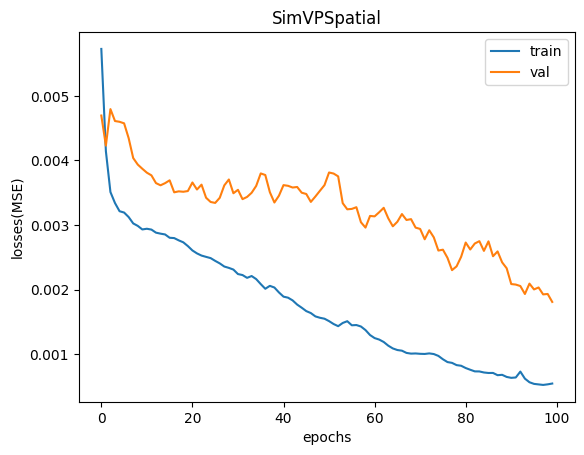

In [10]:
plt.title('SimVPSpatial')
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.xlabel('epochs')
plt.ylabel('losses(MSE)')
plt.legend()
plt.show()